Задание 1#
В этом задании вам потребуется скачать вот этот датасет. Мы с вами уже работали с ним когда изучали pandas. Это все так же Топ-50 самых продаваемых книг на Amazon в период с 2009 по 2019 годы. Требуется выполнить следующее:

* Создать спарк сессию.
* Прочитать датасет в датафрейм.
* Используя только RDD вычислить среднюю цену всех книг, у которых рейтинг выше 4.7
* Построить гистограмму распределения рецензий (столбец Reviews).
* Построить матрицу корреляции для столбцов "User Rating", "Reviews" и "Price".
* Используя библиотеку seaborn построить парные графики (pairplots) столбцов "User Rating", "Reviews" и "Price".

In [1]:
from pyspark.sql import SparkSession, Row
from pyspark.sql.functions import col, avg, collect_list, mean, stddev, max , min

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [2]:
spark = SparkSession.builder.getOrCreate()


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


23/01/30 23:29:21 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [3]:
data = spark.read.csv('bestsellers with categories.csv', header=True, inferSchema=True)
data.show()


+--------------------+--------------------+-----------+-------+-----+----+-----------+
|                Name|              Author|User Rating|Reviews|Price|Year|      Genre|
+--------------------+--------------------+-----------+-------+-----+----+-----------+
|10-Day Green Smoo...|            JJ Smith|        4.7|  17350|    8|2016|Non Fiction|
|   11/22/63: A Novel|        Stephen King|        4.6|   2052|   22|2011|    Fiction|
|12 Rules for Life...|  Jordan B. Peterson|        4.7|  18979|   15|2018|Non Fiction|
|1984 (Signet Clas...|       George Orwell|        4.7|  21424|    6|2017|    Fiction|
|5,000 Awesome Fac...|National Geograph...|        4.8|   7665|   12|2019|Non Fiction|
|A Dance with Drag...| George R. R. Martin|        4.4|  12643|   11|2011|    Fiction|
|A Game of Thrones...| George R. R. Martin|        4.7|  19735|   30|2014|    Fiction|
|A Gentleman in Mo...|         Amor Towles|        4.7|  19699|   15|2017|    Fiction|
|A Higher Loyalty:...|         James Comey|

In [4]:
data_f = data.filter(col('User Rating') >  4.7)
data_f.select(avg('Price')).collect()

[Row(avg(Price)=10.69832402234637)]

<AxesSubplot:ylabel='Frequency'>

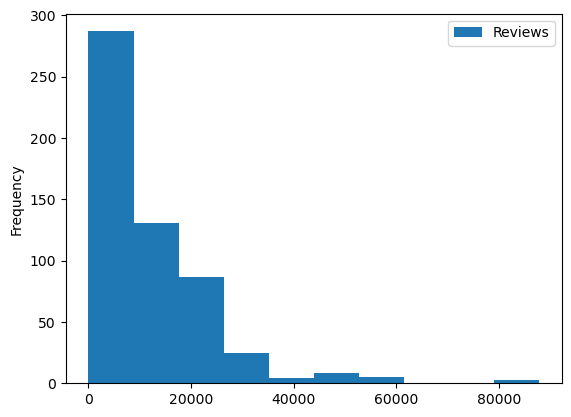

In [5]:
data[['Reviews']].toPandas().plot(kind='hist')


In [6]:
matrix = data[['User Rating', 'Reviews', 'Price']].toPandas()
matrix.corr()

,User Rating,Reviews,Price
User Rating,1.000000,-0.001729,-0.133086
Reviews,-0.001729,1.000000,-0.109182
Price,-0.133086,-0.109182,1.000000


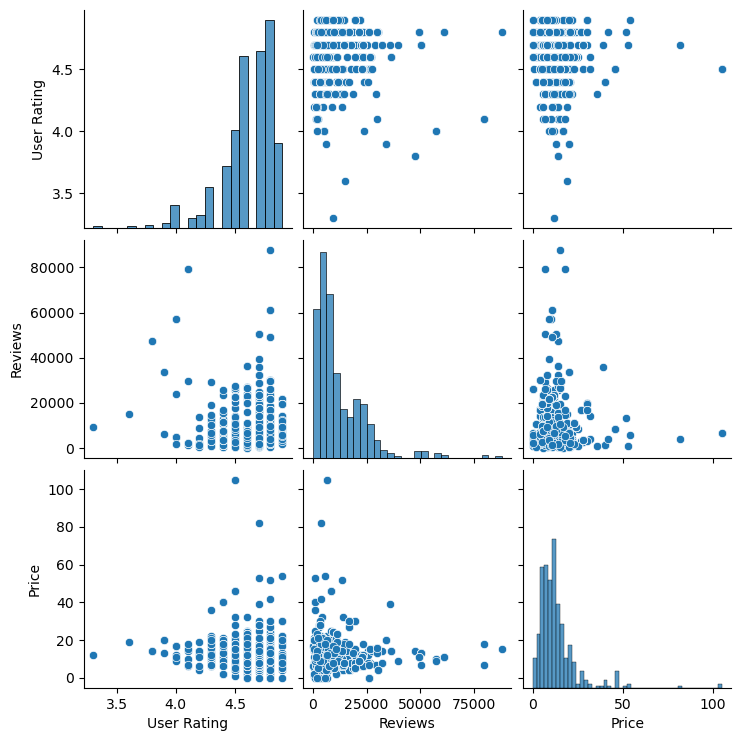

In [7]:
sns.pairplot(matrix)


Задание 2
При выполнении этого задания разрешается использовать только Spark SQL. Для датасета из предыдущего задания выполните следующее:

* Найдите автора с самым высоким рейтингом.
* Найдите трех авторов с самым низким рейтингом.
* Определите какой автор получил наибольшее количество рецензий.
* Определите какой автор написал наибольшее количество книг за весь доступный в данных период.
* Определите какая книга жанра "Fiction" имеет самый маленький рейтинг.
* Определите какая книга жанра "Non Fiction" имеет самый высокий рейтинг.

In [8]:
data = data.withColumnRenamed('User Rating', 'User_Rating')
data.show()

+--------------------+--------------------+-----------+-------+-----+----+-----------+
|                Name|              Author|User_Rating|Reviews|Price|Year|      Genre|
+--------------------+--------------------+-----------+-------+-----+----+-----------+
|10-Day Green Smoo...|            JJ Smith|        4.7|  17350|    8|2016|Non Fiction|
|   11/22/63: A Novel|        Stephen King|        4.6|   2052|   22|2011|    Fiction|
|12 Rules for Life...|  Jordan B. Peterson|        4.7|  18979|   15|2018|Non Fiction|
|1984 (Signet Clas...|       George Orwell|        4.7|  21424|    6|2017|    Fiction|
|5,000 Awesome Fac...|National Geograph...|        4.8|   7665|   12|2019|Non Fiction|
|A Dance with Drag...| George R. R. Martin|        4.4|  12643|   11|2011|    Fiction|
|A Game of Thrones...| George R. R. Martin|        4.7|  19735|   30|2014|    Fiction|
|A Gentleman in Mo...|         Amor Towles|        4.7|  19699|   15|2017|    Fiction|
|A Higher Loyalty:...|         James Comey|

In [9]:
data.createOrReplaceTempView("DataSql")

In [10]:
spark.sql('select DISTINCT Author, User_Rating from DataSql where User_Rating == (SELECT MAX(User_Rating) FROM Datasql)').show()

+--------------------+-----------+
|              Author|User_Rating|
+--------------------+-----------+
|Emily Winfield Ma...|        4.9|
|     Bill Martin Jr.|        4.9|
|          Eric Carle|        4.9|
|          Pete Souza|        4.9|
|      Nathan W. Pyle|        4.9|
|         Jeff Kinney|        4.9|
|     Brandon Stanton|        4.9|
|        J.K. Rowling|        4.9|
|         Chip Gaines|        4.9|
|           Dr. Seuss|        4.9|
|      Alice Schertle|        4.9|
|       Rush Limbaugh|        4.9|
|          Dav Pilkey|        4.9|
|       J. K. Rowling|        4.9|
|      Patrick Thorpe|        4.9|
|       Mark R. Levin|        4.9|
|Sherri Duskey Rinker|        4.9|
|          Jill Twiss|        4.9|
|         Sarah Young|        4.9|
|  Lin-Manuel Miranda|        4.9|
+--------------------+-----------+



In [11]:
spark.sql('select DISTINCT Author, User_Rating from DataSql ORDER BY user_rating LIMIT 3').show()

+------------+-----------+
|      Author|User_Rating|
+------------+-----------+
|J.K. Rowling|        3.3|
|  Harper Lee|        3.6|
|   E L James|        3.8|
+------------+-----------+



In [12]:
spark.sql('select DISTINCT Author, Reviews from DataSql where Reviews == (SELECT MAX(Reviews) FROM Datasql)').show()

+-----------+-------+
|     Author|Reviews|
+-----------+-------+
|Delia Owens|  87841|
+-----------+-------+



In [13]:
spark.sql('select Author, Quantity from (select Author, count(Author) as Quantity from DataSql group by Author) ORDER BY Quantity DESC LIMIT 1').show()


+-----------+--------+
|     Author|Quantity|
+-----------+--------+
|Jeff Kinney|      12|
+-----------+--------+



In [14]:
spark.sql('select DISTINCT Name, User_Rating from DataSql where (Genre == "Fiction" and User_Rating == (SELECT min(User_Rating) FROM Datasql))').show()



+------------------+-----------+
|              Name|User_Rating|
+------------------+-----------+
|The Casual Vacancy|        3.3|
+------------------+-----------+



In [15]:
spark.sql('select DISTINCT Name, User_Rating from DataSql where (Genre == "Non Fiction" and User_Rating == (SELECT max(User_Rating) FROM Datasql))').show()



+--------------------+-----------+
|                Name|User_Rating|
+--------------------+-----------+
|Jesus Calling: En...|        4.9|
|Obama: An Intimat...|        4.9|
|Hamilton: The Rev...|        4.9|
|Unfreedom of the ...|        4.9|
|  The Magnolia Story|        4.9|
|Humans of New Yor...|        4.9|
+--------------------+-----------+



Задание 3#
Постройте гистограмму среднего количества рецензий по годам. 
В виде отдельной гистограммы визуализируйте количество книг жанра "Fiction" и "Non Fiction" за весь доступный период.


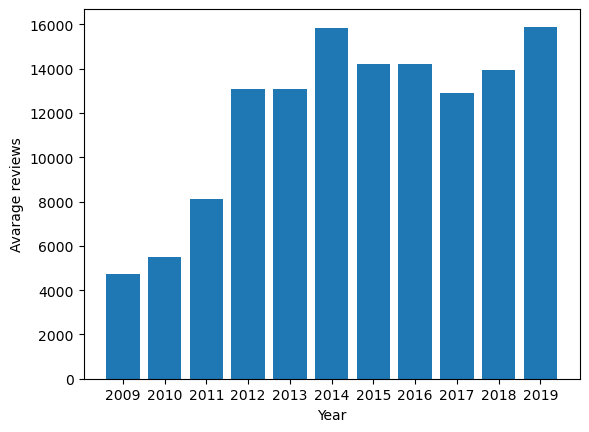

In [16]:
rev_years = data.groupBy("Year").avg("Reviews").sort('Year')
x = np.array(rev_years.select('Year').toPandas()['Year'])
y = np.array(rev_years.select('avg(Reviews)').toPandas()['avg(Reviews)'])

plt.bar(x,y,align='center')
plt.xlabel('Year')
plt.ylabel('Avarage reviews')
plt.xticks(x)
plt.show()

In [17]:

books = data.groupBy(['Genre']).count().toPandas()
books

,Genre,count
0,Fiction,240
1,Non Fiction,310


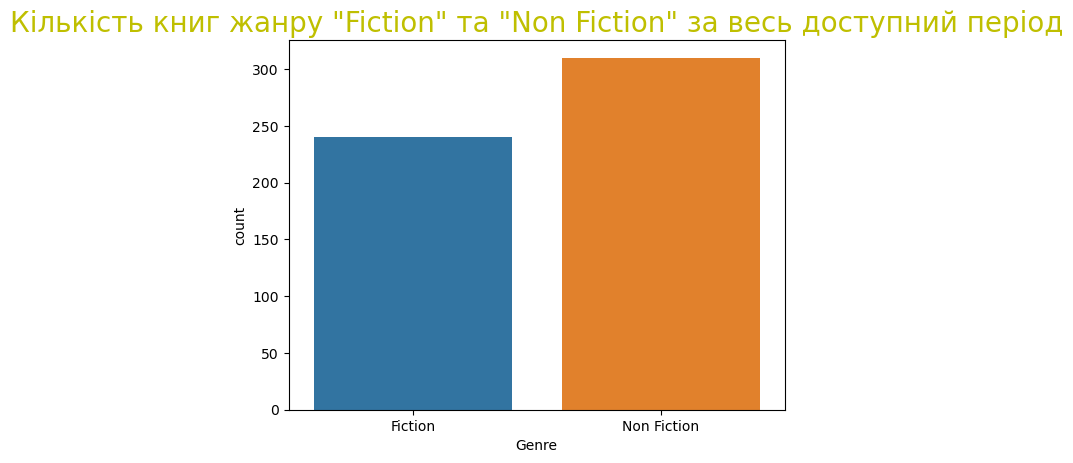

In [18]:

sns.barplot(x="Genre", y="count", data=books)
plt.title('Кількість книг жанру "Fiction" та "Non Fiction" за весь доступний період', fontsize=20, color='y')
plt.show()